In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns
import os

from scipy import stats

sns.set(style='ticks')
project_path = os.path.abspath(os.path.relpath('../../../../', os.getcwd()))
data_1= pd.read_excel(project_path + '/BilinearNetwork/Data/Result/detection/detect_seizure/LSTM-small.xlsx')
data_2=pd.read_excel(project_path + '/BilinearNetwork/Data/Result/detection/detect_seizure/LSTM-large.xlsx')

In [42]:

accuracies1 = data_1['delay']
pattern = r'(\d+(?:\.\d+)?)\((\d+(?:\.\d+)?)\)'
matches1 = [re.match(pattern, acc) for acc in accuracies1]

accuracies1 = [(float(match.group(1)), float(match.group(2))) for match in matches1]
means1, stds1 = zip(*accuracies1)

 


accuracies2 = data_2['delay']
matches2 = [re.match(pattern, acc) for acc in accuracies2]

accuracies2 = [(float(match.group(1)), float(match.group(2))) for match in matches2]
means2, stds2 = zip(*accuracies2)


    


In [43]:
t_statistic, p_value = stats.ttest_ind(means1, means2, equal_var=False)
print(f't-statistic: {t_statistic}'
      f'\np-value: {p_value}')

t-statistic: 0.5243501699059061
p-value: 0.6032852120904955


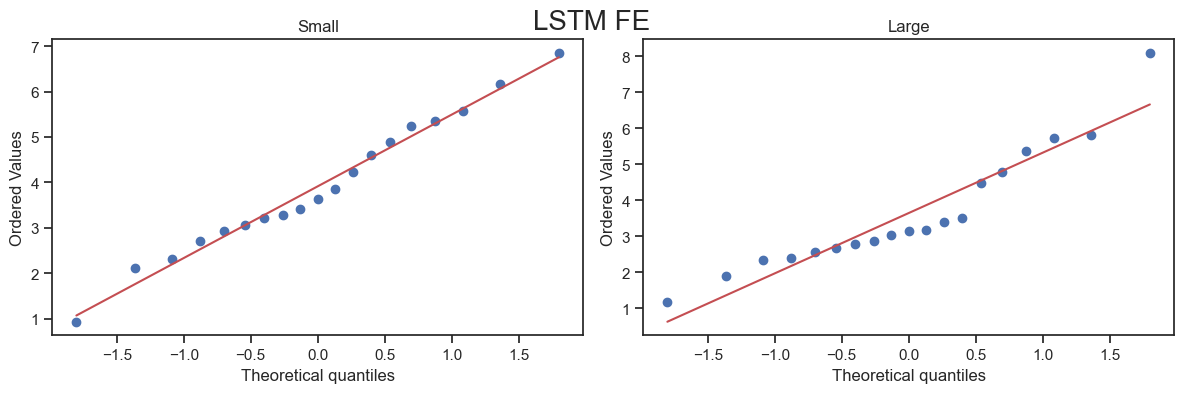

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
stats.probplot(means1, dist="norm", plot=axs[0])
axs[0].set_title('Small')
stats.probplot(means2, dist="norm", plot=axs[1])
axs[1].set_title('Large')
fig.tight_layout()
# title for the figure
plt.suptitle('LSTM FE',fontsize=20)
plt.show()